## Lab 7
### Clusterization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## K-means algorithm

## Task 1

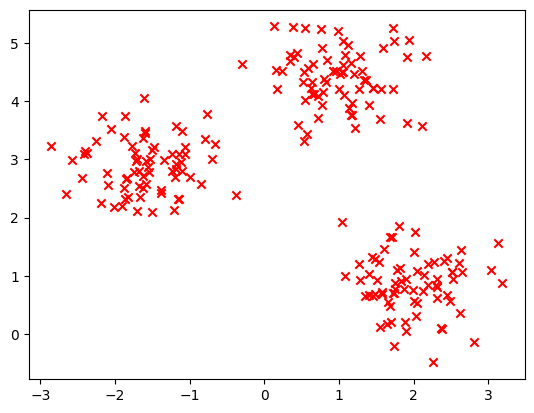

In [2]:
X, y= make_blobs(n_samples=210, centers=3, n_features=2, cluster_std=0.5, shuffle=True,random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')

Text(0, 0.5, 'X1')

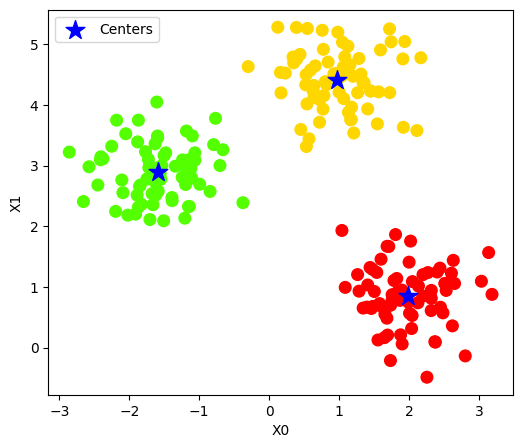

In [13]:
km = KMeans(n_clusters=3, init='random')
km.fit(X,y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In [14]:
print(km.inertia_)

98.78710787930851


## Task 2

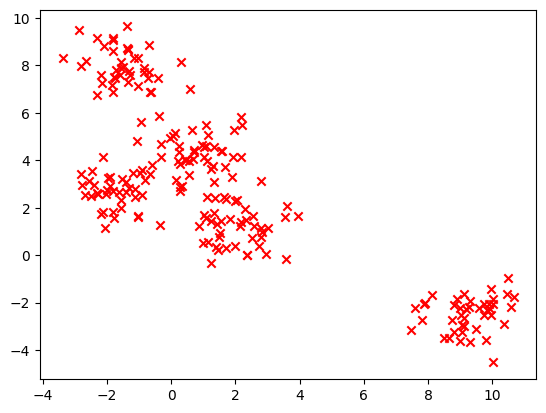

In [19]:
X, y= make_blobs(n_samples=210, centers=5, n_features=2, cluster_std=0.8, shuffle=True,random_state=0)
plt.scatter(X[:,0], X[:,1], c='red', marker='x')

745.9994261427457


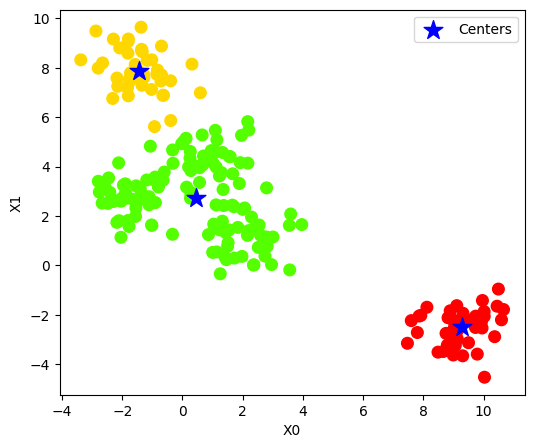

In [22]:
km = KMeans(n_clusters=3, init='random')
km.fit(X,y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

245.4656592580407


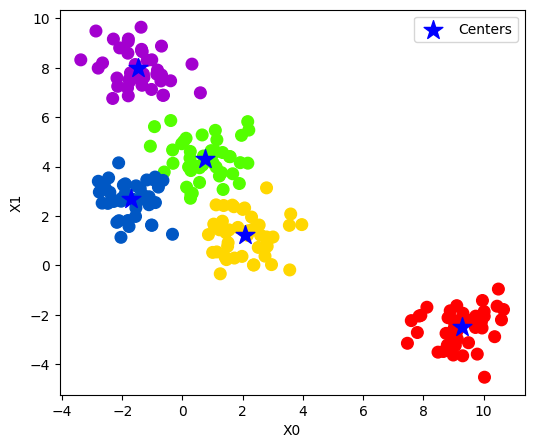

In [23]:
km = KMeans(n_clusters=5, init='random')
km.fit(X,y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

## Task 3 K-means ++

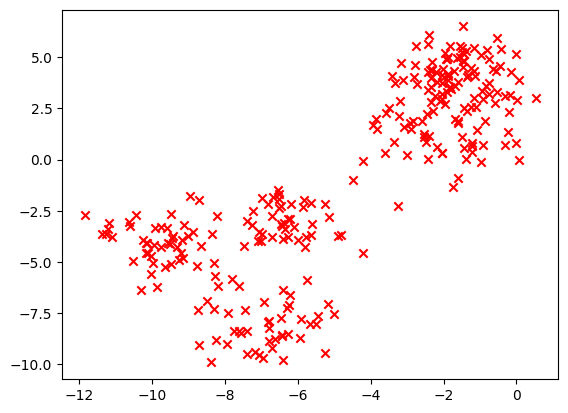

In [29]:
X, y = make_blobs(n_samples=270, centers=6, n_features=2, cluster_std=1, shuffle=True, random_state=1)

plt.scatter(X[:, 0], X[:, 1], c='red', marker='x')

268.86984022318114


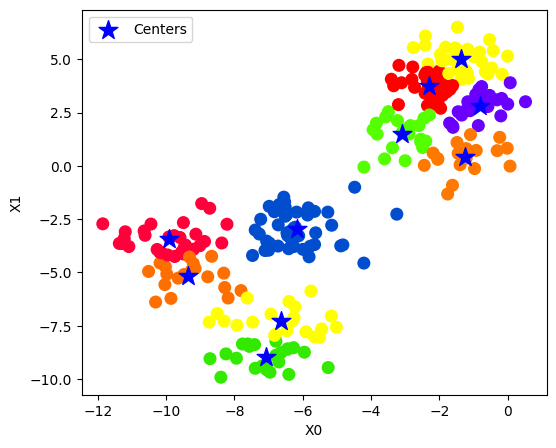

In [34]:
km = KMeans(n_clusters=10, init='k-means++')
km.fit(X,y)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=70, c=km.labels_, cmap=plt.cm.prism) 
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='*', s=200,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

print(km.inertia_)

## Task 4 Elbow method

In [41]:
def elbow_method(X, n_clusters):
    list_of_inertia = []

    for k in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=k, init="random", n_init=10)
        kmeans.fit(X)
        list_of_inertia.append(kmeans.inertia_)
        
        plt.figure(figsize=(6, 4))  # Można dostosować rozmiar każdego indywidualnego wykresu
        plt.scatter(X[:, 0], X[:, 1], s=70, c=kmeans.labels_, cmap=plt.cm.prism)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200,
                    color='blue', label='Centers')
        plt.legend(loc='best')
        plt.xlabel('X0')
        plt.ylabel('X1')
        plt.title(f"Number of clusters: {k}")
        plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(range(1, n_clusters + 1), list_of_inertia)
    plt.title("Inertia")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia")
    plt.show()
    

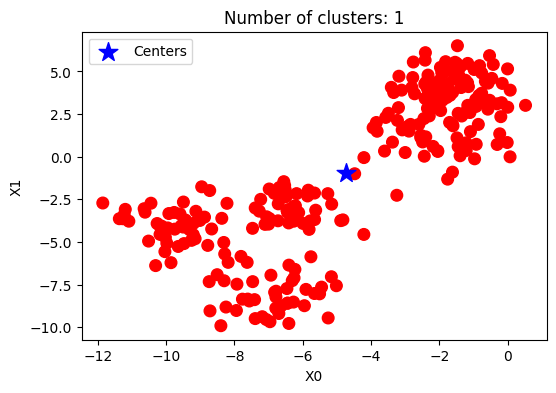

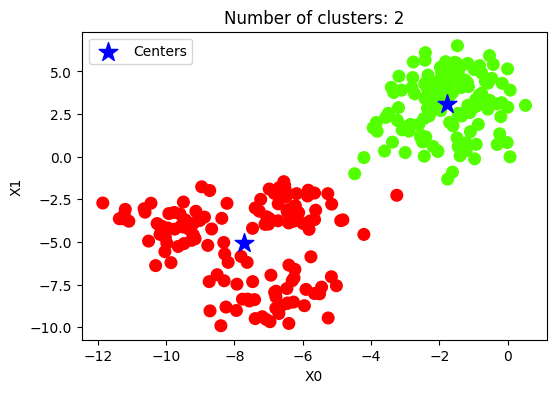

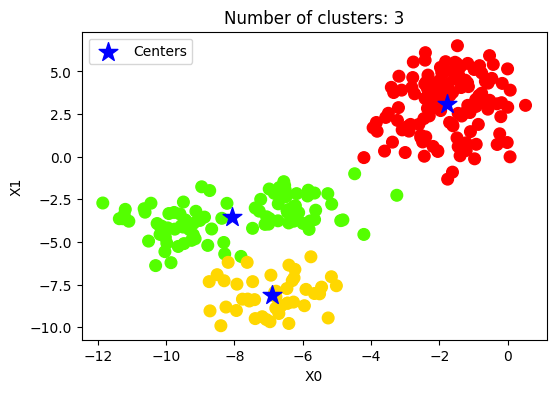

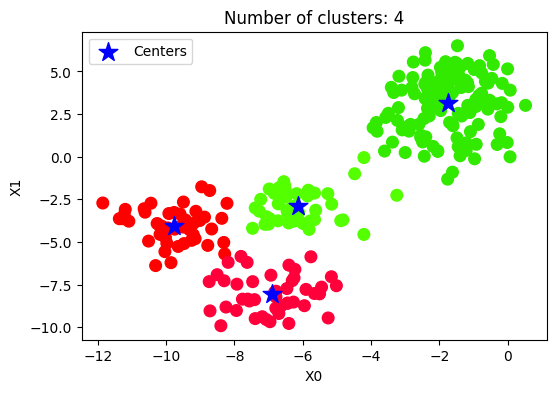

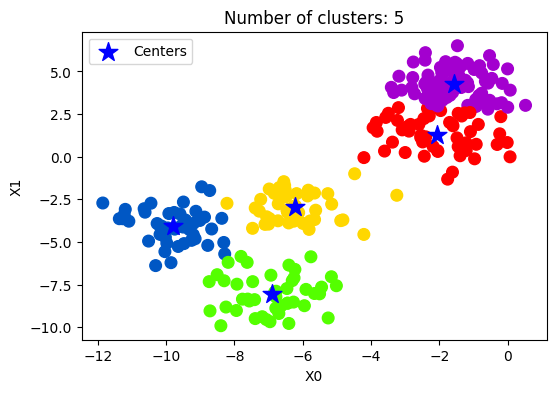

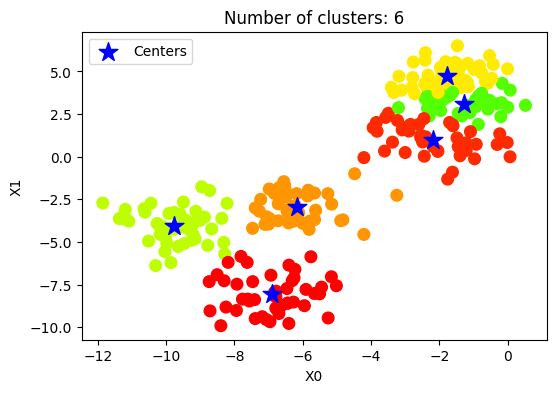

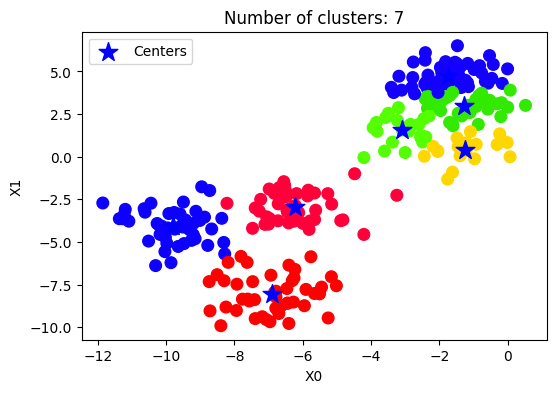

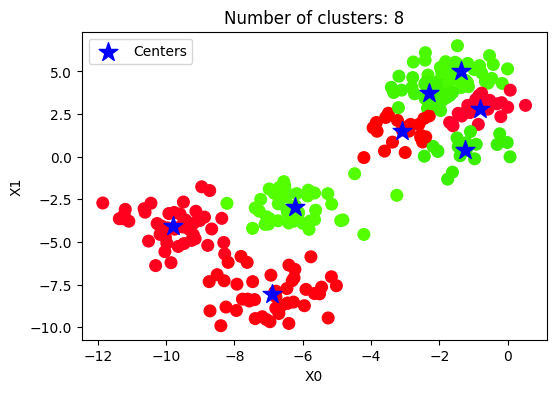

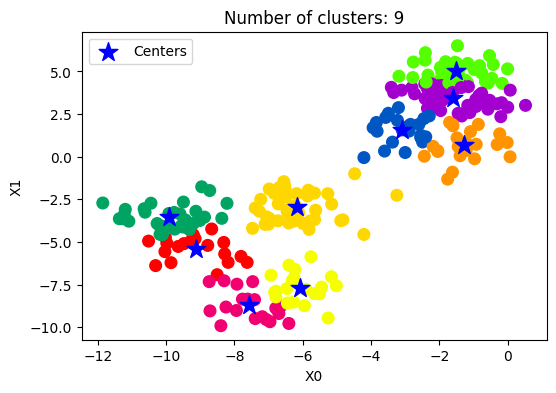

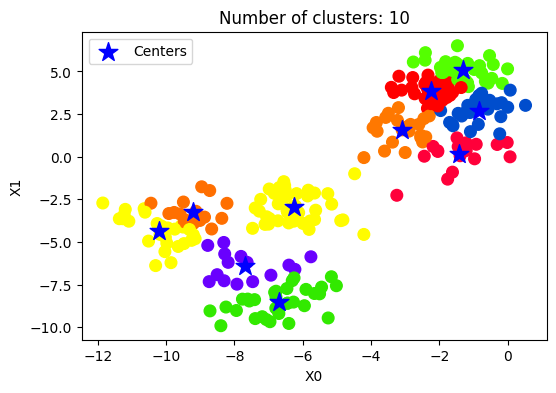

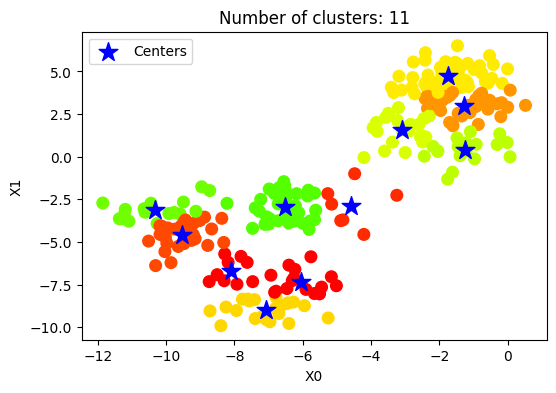

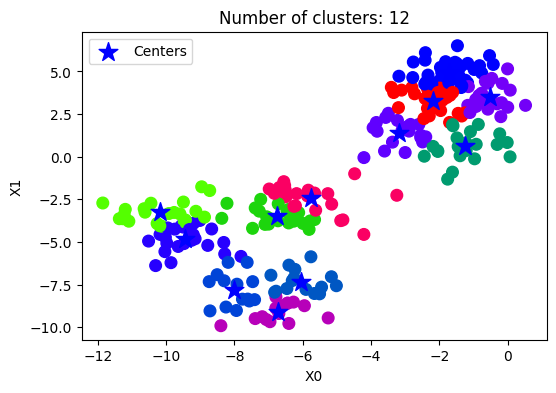

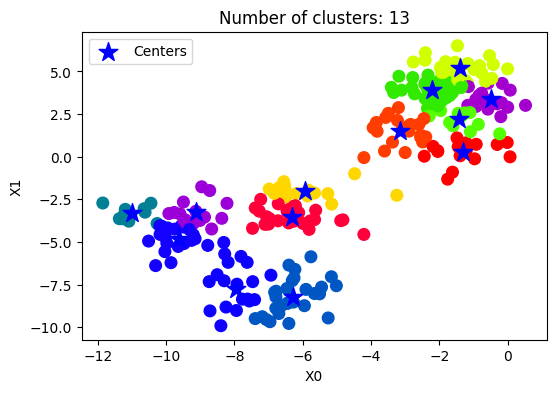

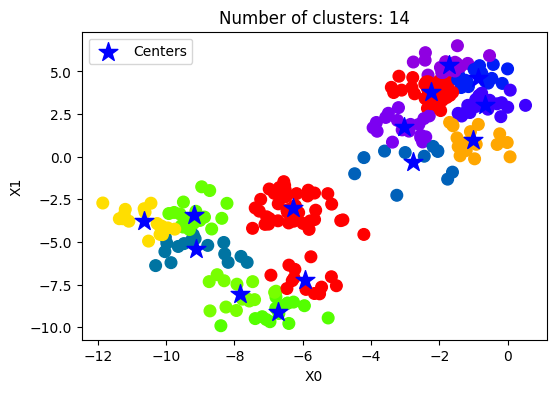

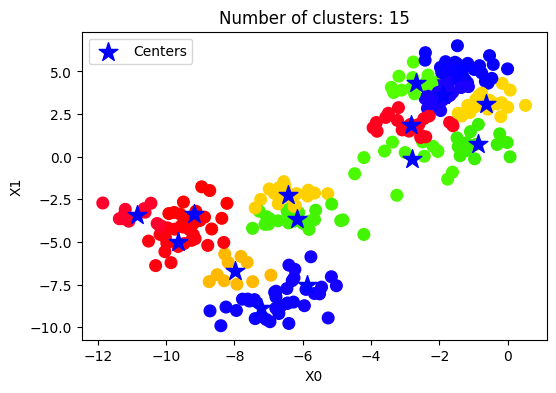

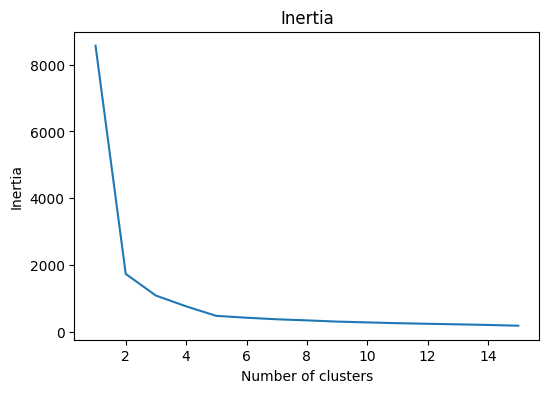

In [42]:
elbow_method(X, 15)

## Task 5

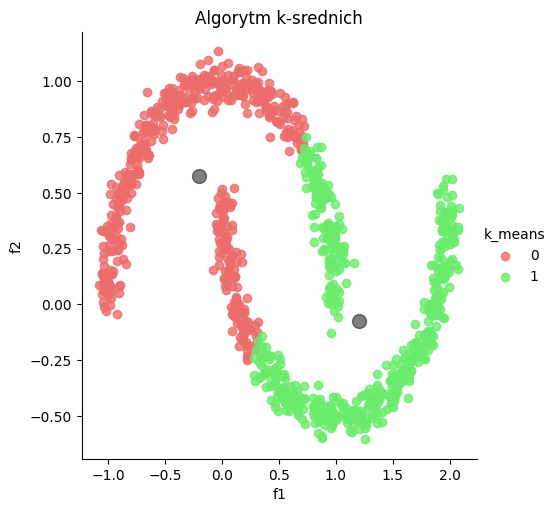

In [25]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])
#metoda klasteryzacji
# km -model KMeans
#y_km - wynik predykcji
km = KMeans(n_clusters=2, init="random")
y_km = km.fit_predict(x, y)


#wykres
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=100, alpha=0.5)
plt.show()